In [3]:
library(tidyverse)

In [4]:
meth_df <- readRDS('../data/methylation/Methylation_files_with_counts/mean_methylation_with_counts_NAs_removed_with_binID.rds')
head(meth_df)

chr,start,end,bin_number,bin_id,methylation,n_meth_values_in_bin,n_na_meth_values_in_bin
chr1,750000,1000000,3,chr1_3,48.69058,11554,0
chr1,1000000,1250000,4,chr1_4,55.44770,20073,0
chr1,1250000,1500000,5,chr1_5,63.11780,18631,0
chr1,1750000,2000000,7,chr1_7,62.01188,13403,0
chr1,2000000,2250000,8,chr1_8,60.11379,16934,0
chr1,2250000,2500000,9,chr1_9,57.19907,16015,0


In [22]:
dim(meth_df)

[1] 10269     8

In [5]:
# check the sum of NA values of all windows

sum(meth_df$n_na_meth_values_in_bin)

[1] 0

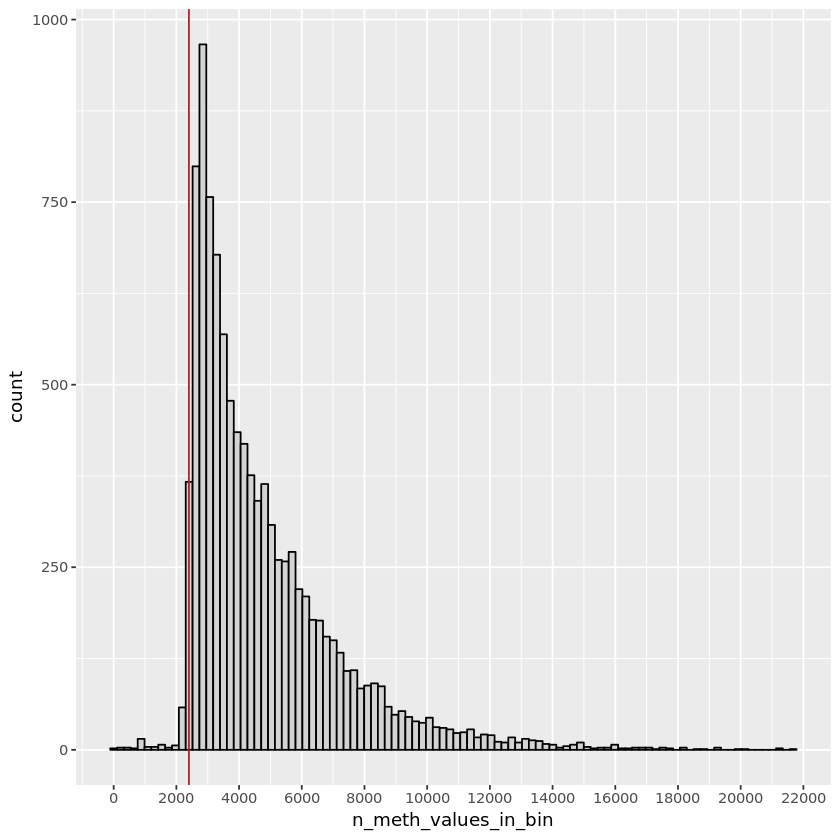

In [21]:
# plot the histogram of number of methylation values in the windows

ggplot(meth_df) + geom_histogram(aes(x = n_meth_values_in_bin), bins = 100, fill = "lightgrey", color = "black") + 
    scale_x_continuous(breaks = seq(0, 22500, by = 2000)) + geom_vline(aes(xintercept = 2400), color = "firebrick")

In [23]:
meth_df %>% filter(n_meth_values_in_bin < 2000) %>% summarize(n = n())
meth_df %>% filter(n_meth_values_in_bin < 2200) %>% summarize(n = n())
meth_df %>% filter(n_meth_values_in_bin < 2300) %>% summarize(n = n())
meth_df %>% filter(n_meth_values_in_bin < 2400) %>% summarize(n = n())
meth_df %>% filter(n_meth_values_in_bin < 2500) %>% summarize(n = n())
meth_df %>% filter(n_meth_values_in_bin < 3000) %>% summarize(n = n())

211*100/10269

n
46


n
62


n
107


n
211


n
427


n
2412


[1] 2.054728

## Conclusion

There are same windows where we have very few methylation values. Therefore, we do not trust the mean methylation value in these windows and we will leave these windows out of the further analyzes. 
The threshold was set to 2400. This means that all the bins that have less than 2400 methylation values, are not used in further analyzes. With this threshold, we drop 211 bins, which is 2.055% out of the total number of bins.

In [26]:
dim(meth_df)
new_meth_df <- meth_df %>% filter(n_meth_values_in_bin >= 2400)
dim(new_meth_df)

[1] 10269     8

[1] 10058     8

In [28]:
saveRDS(new_meth_df, file = '../data/methylation/Methylation_files_with_counts/mean_methylation_with_counts_NAs_removed_with_binID_FILTERED.rds')